<a href="https://colab.research.google.com/github/Krishs15/DeepLearning_2025-2026/blob/main/DL_LAB02(21_01_2026).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle URL: https://www.kaggle.com/code/ibrahimqasimi/mnist-digit-recognition-cnn-deep-learning/notebook

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


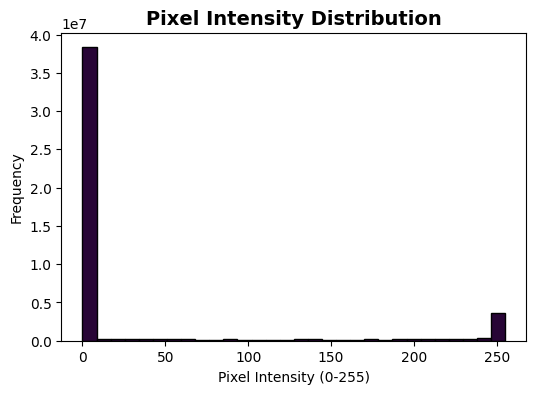

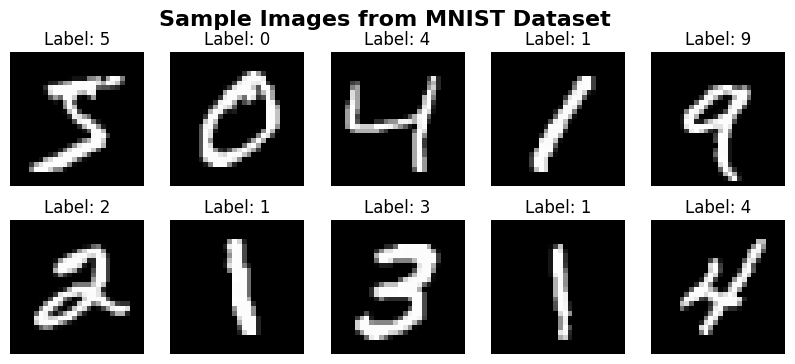

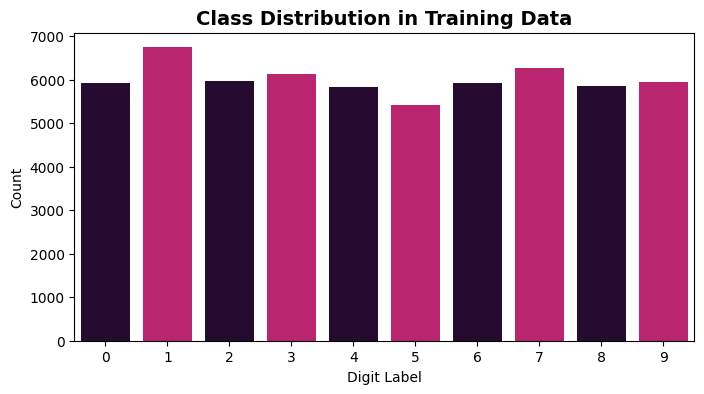

After normalization:
Training data min: 0.0 max: 1.0
Testing data min: 0.0 max: 1.0
Training data shape after reshape: (60000, 28, 28, 1)
Testing data shape after reshape: (10000, 28, 28, 1)
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.7321 - loss: 0.8055 - val_accuracy: 0.9757 - val_loss: 0.0793
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9552 - loss: 0.1524 - val_accuracy: 0.9855 - val_loss: 0.0501
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9677 - loss: 0.1055 - val_accuracy: 0.9865 - val_loss: 0.0445
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9724 - loss: 0.0908 - val_accuracy: 0.9880 - val_loss: 0.0394
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9773 - loss: 0.0747 - val_accuracy: 0.9912 - val_loss: 0.0330
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9797 - loss: 0.0680 - val_accuracy: 0.9913 - val_loss: 0.0303
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━

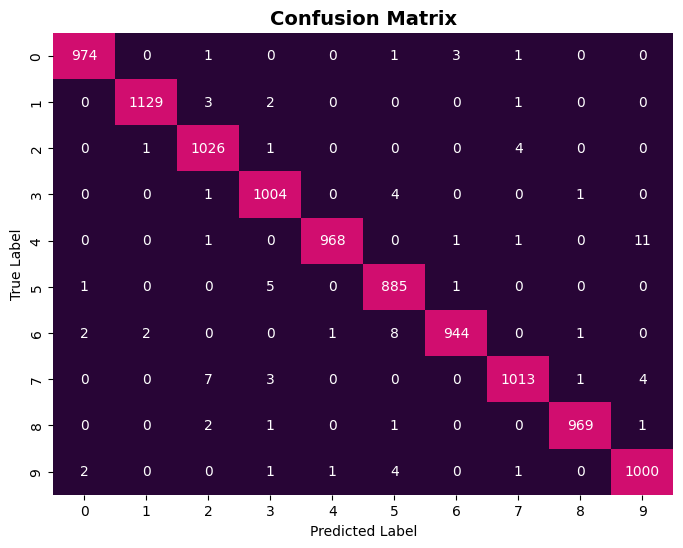

📊 Classification Report:

              precision    recall  f1-score   support

           0     0.9949    0.9939    0.9944       980
           1     0.9973    0.9947    0.9960      1135
           2     0.9856    0.9942    0.9899      1032
           3     0.9872    0.9941    0.9906      1010
           4     0.9979    0.9857    0.9918       982
           5     0.9801    0.9922    0.9861       892
           6     0.9947    0.9854    0.9900       958
           7     0.9922    0.9854    0.9888      1028
           8     0.9969    0.9949    0.9959       974
           9     0.9843    0.9911    0.9877      1009

    accuracy                         0.9912     10000
   macro avg     0.9911    0.9911    0.9911     10000
weighted avg     0.9912    0.9912    0.9912     10000



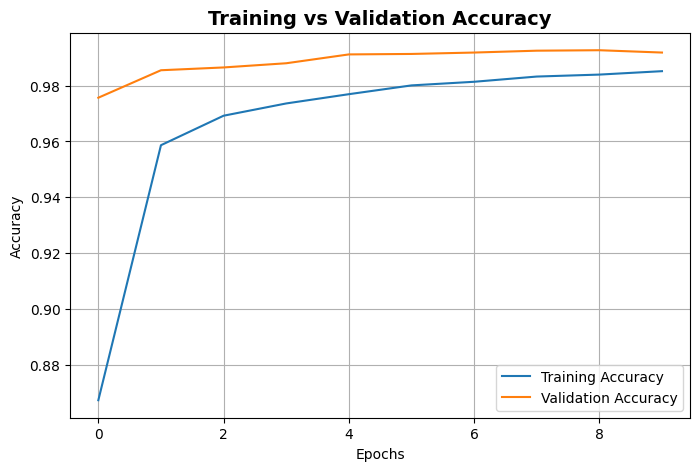

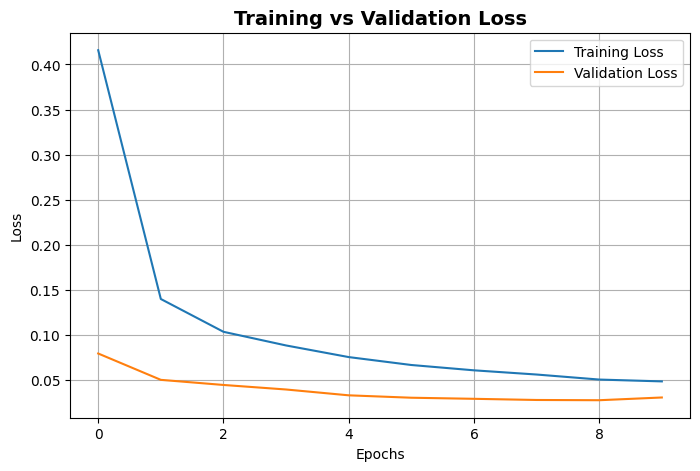

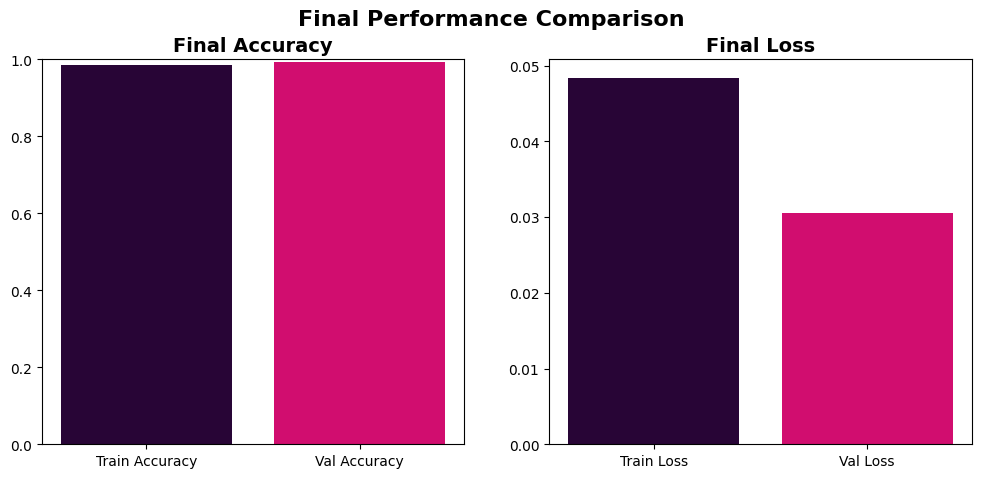

Total Correctly Classified Images: 9912


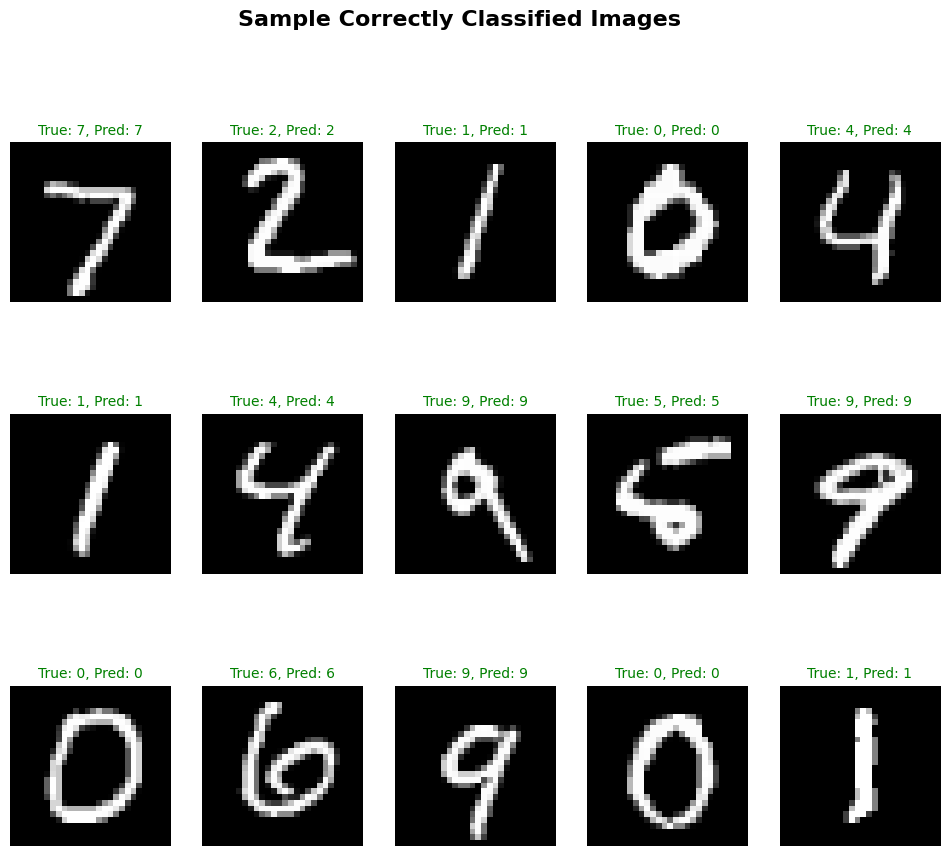

Total Misclassified Images: 88


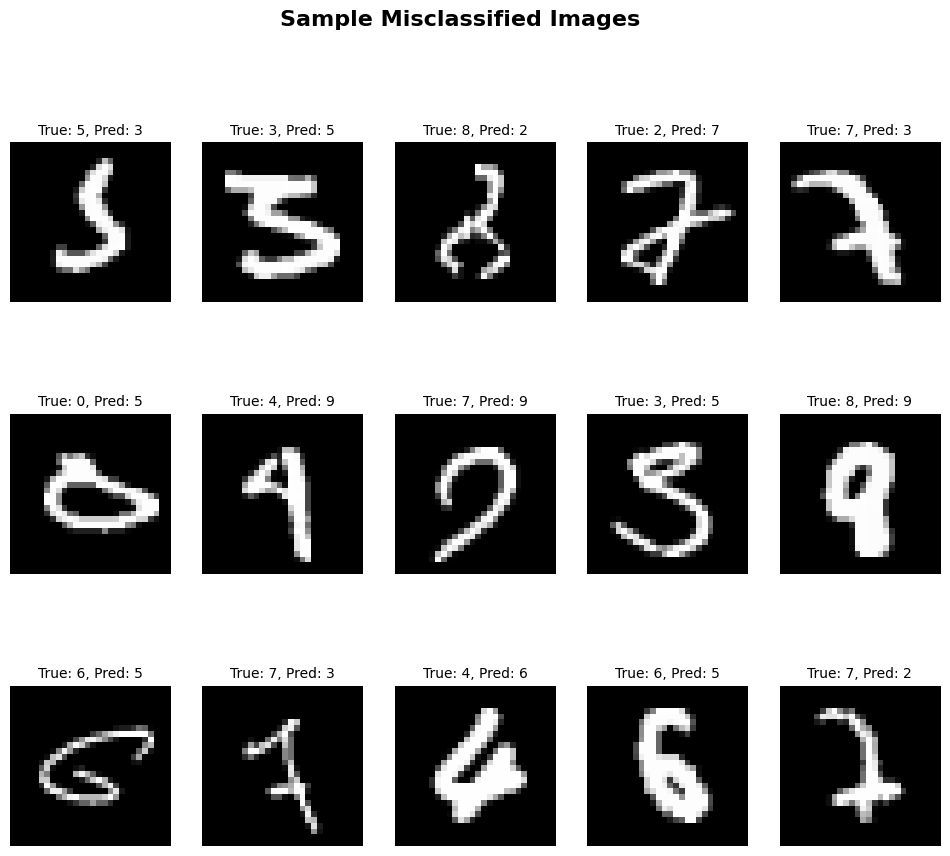

✅ Model has been saved successfully as 'mnist_cnn_model.h5'


In [1]:
# Data handling and numerical computations
import numpy as np

# Load MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Deep learning framework (TensorFlow & Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

colors = ["#280536", "#d10d6f"]

# Splitting into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

unique_classes = np.unique(y_train)
print("Unique labels:", unique_classes)
print("Number of classes:", len(unique_classes))

plt.figure(figsize=(6,4))
plt.hist(x_train.reshape(-1), bins=30, color="#280536", edgecolor="black")
plt.title("Pixel Intensity Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16, fontweight='bold')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x=y_train, palette=colors)
plt.title("Class Distribution in Training Data", fontsize=14, fontweight='bold')
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()


# Convert pixel values from integers (0-255) to floats (0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("After normalization:")
print("Training data min:", x_train.min(), "max:", x_train.max())
print("Testing data min:", x_test.min(), "max:", x_test.max())

# Reshape training and testing images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("Training data shape after reshape:", x_train.shape)
print("Testing data shape after reshape:", x_test.shape)

# Define the CNN architecture
model = Sequential([
    # First Conv + Pool block
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Second Conv + Pool block
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Flatten + Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output Layer (10 classes for digits 0–9)
    Dense(10, activation='softmax')
])

# Compile the CNN model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with validation split
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# Check what metrics are stored in history
print("History keys:", history.history.keys())

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap=colors, cbar=False)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
print("📊 Classification Report:\n")
print(report)

# Plot training vs validation accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot training vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Extract final accuracy and loss values
final_acc = [history.history['accuracy'][-1], history.history['val_accuracy'][-1]]
final_loss = [history.history['loss'][-1], history.history['val_loss'][-1]]

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Accuracy Bar Plot
ax[0].bar(['Train Accuracy', 'Val Accuracy'], final_acc, color=colors)
ax[0].set_title("Final Accuracy", fontsize=14, fontweight="bold")
ax[0].set_ylim(0, 1)

# Loss Bar Plot
ax[1].bar(['Train Loss', 'Val Loss'], final_loss, color=colors)
ax[1].set_title("Final Loss", fontsize=14, fontweight="bold")

plt.suptitle("Final Performance Comparison", fontsize=16, fontweight="bold")
plt.show()

# Find correctly classified examples
correct_idx = np.where(y_pred == y_test)[0]

print(f"Total Correctly Classified Images: {len(correct_idx)}")

# Show first 15 correctly classified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(correct_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10, color='green')
    plt.axis('off')
plt.suptitle("Sample Correctly Classified Images", fontsize=16, fontweight="bold")
plt.show()

# Find misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Total Misclassified Images: {len(misclassified_idx)}")

# Show first 15 misclassified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Sample Misclassified Images", fontsize=16, fontweight="bold")
plt.show()

# Save the trained model
model.save("mnist_cnn_model.h5")

# Print confirmation
print("✅ Model has been saved successfully as 'mnist_cnn_model.h5'")